# Section 1: Business Understanding  
  
  FIFA ranking is a ranking system for men’s national teams in association football. And fifa_ranking dataset has all national team ranking from 1993. This project will analyze the matches from results.csv dataset to see if the FIFA ranking has a correlation with matches results.
## Questions:
### - Does FIFA Ranking reflects the real results?
### - What confederation has the most wins in the World Cup?
### - Who are the most dominant World Cup winners of all-time?

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Section 2: Data Understanding  

In [6]:
df = pd.read_csv('./results.csv') # matches results dataframe
fifa_ranking_df = pd.read_csv('./fifa_ranking.csv') # FIFA ranking dataframe

print(df.shape)
df.head()

(42650, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
print(fifa_ranking_df.shape)
fifa_ranking_df.head()

(63054, 9)


,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,43818,82,Iraq,IRQ,15,0,0,AFC,1992-12-31
1,43873,107,Mozambique,MOZ,9,0,0,CAF,1992-12-31
2,43816,108,Indonesia,IDN,9,0,0,AFC,1992-12-31
3,1882218,109,Antigua and Barbuda,ATG,8,0,0,CONCACAF,1992-12-31
4,43820,110,Jordan,JOR,8,0,0,AFC,1992-12-31


# Section 3: Data Preparing

In [8]:
# Cleaning matches results
df.drop(['city', 'country', 'neutral'], axis=1, inplace=True)
df = df[df.tournament != 'Friendly']

In [9]:
# Cleaning FIFA ranking
fifa_ranking_df.drop(['country_abrv', 'previous_points', 'rank_change'], axis=1, inplace=True)
print(fifa_ranking_df.shape)
fifa_ranking_df.head()

(63054, 6)


,id,rank,country_full,total_points,confederation,rank_date
0,43818,82,Iraq,15,AFC,1992-12-31
1,43873,107,Mozambique,9,CAF,1992-12-31
2,43816,108,Indonesia,9,AFC,1992-12-31
3,1882218,109,Antigua and Barbuda,8,CONCACAF,1992-12-31
4,43820,110,Jordan,8,AFC,1992-12-31


In [10]:
# Choosing recent matches because the FIFA ranking starts at 1993/8/8
recent_matches = df.loc[(df['date'] >= "1993-8-8")]
print(recent_matches.shape)
recent_matches.head()

(15802, 6)


,date,home_team,away_team,home_score,away_score,tournament
18135,1994-01-19,Suriname,French Guiana,1,0,CFU Caribbean Cup qualification
18137,1994-01-21,Guyana,French Guiana,1,1,CFU Caribbean Cup qualification
18139,1994-01-23,Barbados,Puerto Rico,0,1,CFU Caribbean Cup qualification
18142,1994-01-23,Suriname,Guyana,2,0,CFU Caribbean Cup qualification
18143,1994-01-25,Grenada,Puerto Rico,1,0,CFU Caribbean Cup qualification


In [11]:
# Choosing only competitive tournaments
comp_tournaments = ['FIFA World Cup', 'FIFA World Cup qualification', 'UEFA Euro', 'UEFA Euro qualification', 'AFC Asian Cup', 
                       'AFC Asian Cup qualification', 'African Cup of Nations', 'African Cup of Nations qualification',
                       'CONCACAF Championship', 'CONCACAF Championship qualification', 'Copa América', 
                       'Copa América qualification', 'Oceania Nations Cup', 'Oceania Nations Cup qualification']

comp_matches = recent_matches.loc[recent_matches['tournament'].isin(comp_tournaments)]
print(comp_matches.shape)
comp_matches.head()

(10436, 6)


,date,home_team,away_team,home_score,away_score,tournament
18233,1994-03-26,Nigeria,Gabon,3,0,African Cup of Nations
18235,1994-03-26,Tunisia,Mali,0,2,African Cup of Nations
18237,1994-03-27,Ghana,Guinea,1,0,African Cup of Nations
18238,1994-03-27,Ivory Coast,Sierra Leone,4,0,African Cup of Nations
18239,1994-03-28,Egypt,Gabon,4,0,African Cup of Nations


In [12]:
# Checking the difference in teams names between the two dataframes
comp_matches_list = comp_matches.home_team.unique()
fifa_ranking_df_list = fifa_ranking_df.country_full.unique()

notFoundCountries = list(set(comp_matches_list) - set(fifa_ranking_df_list))
print(notFoundCountries)

['East Timor', 'Saint Vincent and the Grenadines', 'Taiwan', 'Kyrgyzstan', 'North Korea', 'Brunei', 'Cape Verde', 'DR Congo', 'Eswatini', 'South Korea', 'United States', 'Burma', 'Ivory Coast', 'Saint Kitts and Nevis', 'Iran', 'Saint Lucia', 'United States Virgin Islands']


In [13]:
# Making dictionary to change the conflicted names in FIFA ranking
replacement_mapping_dict = {
    "St. Lucia": "Saint Lucia",
    "Chinese Taipei": "Taiwan",
    "USA": "United States",
    "Côte d'Ivoire": "Ivory Coast",
    "Korea Republic": "South Korea",
    "St. Vincent / Grenadines": "Saint Vincent and the Grenadines",
    "Timor-Leste": "East Timor",
    "Korea DPR": "North Korea",
    "Cabo Verde": "Cape Verde",
    "Brunei Darussalam": "Brunei",
    "Kyrgyz Republic": "Kyrgyzstan",
    "IR Iran": "Iran",
    "Congo DR": "DR Congo",
    "Zaire": "DR Congo",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "Swaziland": "Eswatini",
    "US Virgin Islands": "United States Virgin Islands"
}

Myanmar_dict = {
    "Burma": "Myanmar"
}

final_ranking = fifa_ranking_df
final_ranking.replace({"country_full": replacement_mapping_dict},inplace=True)
final_matches = comp_matches

In [14]:
# Droping some team matches because they don't have rank in FIFA ranking.
# I know it's bad practise and I should create a list, but I didn't have time 
temp = final_matches.drop(final_matches[(final_matches['home_team'] == "Papua New Guinea") & (final_matches['date'] < "1996-09-25")].index)
temp1 = temp.drop(temp[(temp['away_team'] == "Papua New Guinea") & (temp['date'] < "1996-09-25")].index)
temp2 = temp1.drop(temp1[(temp1['home_team'] == "New Caledonia") & (temp1['date'] < "2004-06-09")].index)
temp13 = temp2.drop(temp2[(temp2['away_team'] == "New Caledonia") & (temp2['date'] < "2004-06-09")].index)
temp14 = temp13.drop(temp13[(temp13['home_team'] == "American Samoa") & (temp13['date'] < "1998-10-21")].index)
temp15 = temp14.drop(temp14[(temp14['away_team'] == "American Samoa") & (temp14['date'] < "1998-10-21")].index)
temp16 = temp15.drop(temp15[(temp15['home_team'] == "Tonga") & (temp15['date'] < "1996-11-20")].index)
temp17 = temp16.drop(temp16[(temp16['away_team'] == "Tonga") & (temp16['date'] < "1996-11-20")].index)
temp18 = temp17.drop(temp17[(temp17['home_team'] == "Samoa") & (temp17['date'] < "1996-11-20")].index)
temp19 = temp18.drop(temp18[(temp18['away_team'] == "Samoa") & (temp18['date'] < "1996-11-20")].index)
temp19 = temp19[(temp19.home_team != "Serbia") & (temp19.away_team != "Serbia")]
temp19 = temp19[(temp19.home_team != "Curaçao") & (temp19.away_team != "Curaçao")]
temp19 = temp19[(temp19.home_team != "Burma") & (temp19.away_team != "Burma")]
temp19 = temp19[(temp19.home_team != "Guam") & (temp19.away_team != "Guam")]
temp19 = temp19[(temp19.home_team != "São Tomé and Príncipe") & (temp19.away_team != "São Tomé and Príncipe")]
temp19 = temp19[(temp19.home_team != "Eritrea") & (temp19.away_team != "Eritrea")]
temp19 = temp19[(temp19.home_team != "Bhutan") & (temp19.away_team != "Bhutan")]
temp19 = temp19[(temp19.home_team != "East Timor") & (temp19.away_team != "East Timor")]
temp19 = temp19[(temp19.home_team != "Gibraltar") & (temp19.away_team != "Gibraltar")]
temp19 = temp19[(temp19.home_team != "Timor-Leste") & (temp19.away_team != "Timor-Leste")]
print(temp19.shape)

(10017, 6)


In [15]:
# Checking the difference in teams names between the two dataframes
# Again
final_matches = temp19

final_matches_list = final_matches.home_team.unique()
final_ranking_list = final_ranking.country_full.unique()

temp3 = [item for item in final_matches_list if item not in final_ranking_list]
print(temp3)
print(final_matches.loc[(final_matches['home_team'] == "Burma")])

[]
Empty DataFrame
Columns: [date, home_team, away_team, home_score, away_score, tournament]
Index: []


# Section 4: Evaluation
## Question 1: Does FIFA Ranking reflects the real results?
### Analysis

In [17]:
# Loop through each match and store the winner, the looser, ranks, if the higher team won and the rank difference in 
# new dataframe called q1_df
# NOTE: this code may take 5-10 minutes to run XD
fifa_ranking_df = final_ranking

q1_df = pd.DataFrame(columns = ["winner", "loser", "winnerRank", "loserRank", "higherWon", "rankDif"])

for index, row in final_matches.iterrows():
    if row["home_score"] > row["away_score"]:
        winner = row["home_team"]
        loser = row["away_team"]
        # Getting the winner and loser rows from FIFA ranking dataframe
        winnerRankRow = fifa_ranking_df.loc[(fifa_ranking_df['country_full'] == winner) & (fifa_ranking_df['rank_date'] <= row["date"])]
        loserRankRow = fifa_ranking_df.loc[(fifa_ranking_df['country_full'] == loser) & (fifa_ranking_df['rank_date'] <= row["date"])]
    elif row["home_score"] < row["away_score"]:
        winner = row["away_team"]
        loser = row["home_team"]
        # Getting the winner and loser rows from FIFA ranking dataframe
        winnerRankRow = fifa_ranking_df.loc[(fifa_ranking_df['country_full'] == winner) & (fifa_ranking_df['rank_date'] <= row["date"])]
        loserRankRow = fifa_ranking_df.loc[(fifa_ranking_df['country_full'] == loser) & (fifa_ranking_df['rank_date'] <= row["date"])]
    else:
        # If it's draw we will skip
        continue
        
    
    # Checking if the winner has better rank, and store 1 in isHigher if it is true
    # Also calculating the rank difference
    if winnerRankRow["rank"].values[0] < loserRankRow["rank"].values[0]:
        isHigher = 1
        rankDif = loserRankRow["rank"].values[0] - winnerRankRow["rank"].values[0]
    else:
        isHigher = 0
        rankDif = winnerRankRow["rank"].values[0] - loserRankRow["rank"].values[0]
        
        
    q1_df.loc[q1_df.shape[0]] = [winner, loser, winnerRankRow["rank"].values[0], loserRankRow["rank"].values[0], isHigher, rankDif]

# It will print ready when it finish
print("q1_df is ready!")

q1_df is ready!


In [18]:
print(q1_df.shape)
q1_df.head()

(7849, 6)


,winner,loser,winnerRank,loserRank,higherWon,rankDif
0,Nigeria,Gabon,13,55,1,42
1,Mali,Tunisia,69,38,0,31
2,Ghana,Guinea,39,63,1,24
3,Ivory Coast,Sierra Leone,27,79,1,52
4,Egypt,Gabon,21,55,1,34


In [19]:
# Divide the results to 6 bins and store the count matches and sum of isHigher columns in perc_df
bins = pd.cut(q1_df['rankDif'], [1, 10, 25, 50, 100, 250])
perc_df = q1_df.groupby(bins).agg({'rankDif': ['count'], 'higherWon': ['sum']})
perc_df

,rankDif,higherWon
,count,sum
rankDif,,
"(1, 10]",874,480
"(10, 25]",1461,908
"(25, 50]",1799,1252
"(50, 100]",2248,1770
"(100, 250]",1359,1198


In [20]:
# Calculating the percentage
perc_df['%_isHigher'] = perc_df.loc[:, [('higherWon', 'sum')]].values / perc_df.loc[:, [('rankDif', 'count')]].values * 100
perc_df

,rankDif,higherWon,%_isHigher
,count,sum,
rankDif,,,
"(1, 10]",874,480,54.919908
"(10, 25]",1461,908,62.149213
"(25, 50]",1799,1252,69.594219
"(50, 100]",2248,1770,78.736655
"(100, 250]",1359,1198,88.153054


### Visualisation

Text(0,0.5,'Win rate')

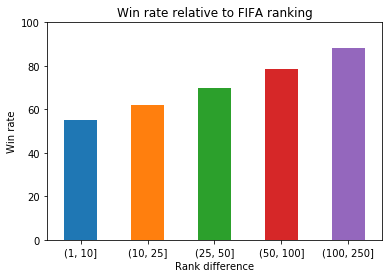

In [21]:
ax = perc_df.plot.bar(y = '%_isHigher', rot=0, title = "Win rate relative to FIFA ranking", ylim=(0,100), legend=False)
ax.set_xlabel("Rank difference")
ax.set_ylabel("Win rate")

This bar chart shows that, the win rate increases as the gab between different team ranks expands. For example, if the difference between two teams is 10 ranks or less the win rate for the bigger team will be 54.9%, and if the difference is more than 100 the win rate is 88.1%. So, the chart clearly indicates that the FIFA World Ranking is reliable.

## Question 2: What confederation has the most wins in the World Cup?
### Analysis

In [22]:
# Choosing only World Cup matches
world_cup_df = df.loc[df['tournament'] == 'FIFA World Cup']

world_cup_df = world_cup_df[(world_cup_df.home_team != "German DR") & (world_cup_df.away_team != "German DR")]

print(world_cup_df.shape)
world_cup_df.head()

(894, 6)


,date,home_team,away_team,home_score,away_score,tournament
1314,1930-07-13,Belgium,United States,0,3,FIFA World Cup
1315,1930-07-13,France,Mexico,4,1,FIFA World Cup
1316,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup
1317,1930-07-14,Peru,Romania,1,3,FIFA World Cup
1318,1930-07-15,Argentina,France,1,0,FIFA World Cup


In [23]:
confed = pd.DataFrame(columns = ["Confederation", "Count", "Winner"])
confed

,Confederation,Count,Winner


In [26]:
# This loop will store the team name and confederation in new dataframe
for index, row in world_cup_df.iterrows():
    if row["home_score"] > row["away_score"]:
        winner = row["home_team"]
        winnerRow = fifa_ranking_df.loc[(fifa_ranking_df['country_full'] == winner)]
        winnerConfederation = winnerRow["confederation"].values[0]
    elif row["home_score"] < row["away_score"]:
        winner = row["away_team"]
        winnerRow = fifa_ranking_df.loc[(fifa_ranking_df['country_full'] == winner)]
        winnerConfederation = winnerRow["confederation"].values[0]
    else:
        continue
    
    
    confed.loc[confed.shape[0]] = [winnerConfederation, 1, winnerRow["country_full"].values[0]]

# It will print ready when it finish
print("confed is ready!")

confed is ready!


### Visualisation

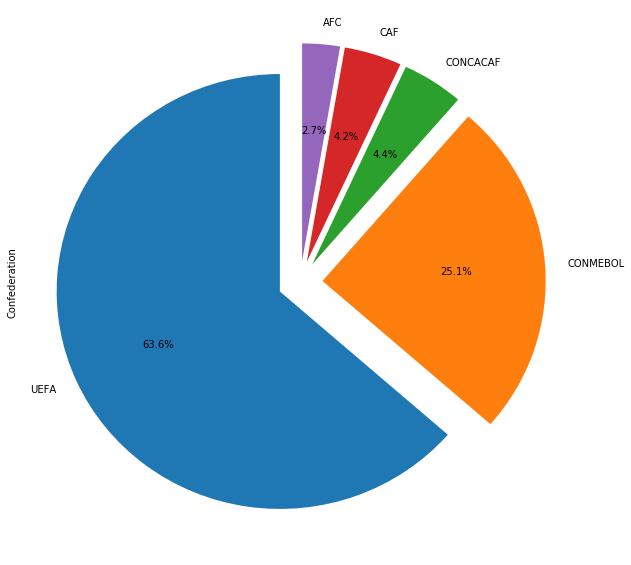

In [27]:
confed_sum = confed['Confederation'].value_counts()
ax2 = confed_sum.plot.pie(subplots=True, figsize=(10, 10), shadow=False, startangle=90, autopct='%1.1f%%', explode=(0.1, 0.1, 0.1, 0.1, 0.1))

The pie chart illustrates the percentages of each confederation’s wins. The Union of European Football Associations (UEFA) has the most wins over other regions with 63.6%. And with the quarter of wins The South American Football Confederation (CONMEBOL) comes in second. The other confederations won only 11.3% matches combined.

## Question 3: Who are the most dominant World Cup winners of all-time?
### Analysis

In [29]:
winner_sum = confed['Winner'].value_counts()
winner_sum.head()

Brazil       216
Germany      201
Italy        135
Argentina    129
France       102
Name: Winner, dtype: int64

### Visualisation

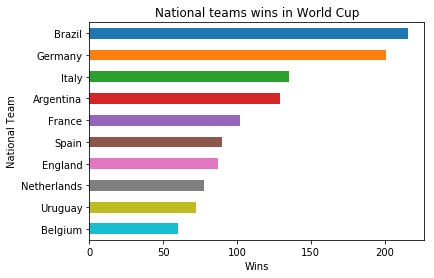

In [30]:
ax3 = winner_sum[:10].plot.barh(rot=0, title = "National teams wins in World Cup", legend=False)
ax3.set_xlabel("Wins")
ax3.set_ylabel("National Team")
ax3.invert_yaxis()

The graph shows the number of wins of top 10 teams in the World Cup. Brazil and Germany dominated the tournament with 72 and 67 wins respectively. The top 10 teams are only from two confederations, 7 teams from UEFA and 2 teams from CONMEBOL.